In [421]:
import pandas as pd
import numpy as np

In [422]:
gwq_df = pd.read_csv('District-Level_GWQ_AllYears.xlsx - District-Level_GWQ_AllYears.csv')

In [423]:
gwq_df.head()
# data summary
gwq_df.describe()

,year,arsenic,carbonate,calcium,chloride,electricalconductivity,fluorine,iron,hydrogencarbonate,potassium,...,percentageofsodium,phosphateion,residualsodiumcarbonate,sodiumabsorptionratio,sulfate,silicondioxide,hardnesstotal,alkalinitytotal,totaldissolvedsolids,potentialofhydrogen
count,11708.000000,412.000000,6421.000000,7404.000000,7808.000000,8688.000000,7992.000000,2996.000000,7417.000000,7059.000000,...,37.000000,754.000000,5608.000000,6612.000000,6721.000000,862.000000,7499.000000,5136.000000,1031.000000,8159.000000
mean,2008.966177,0.450150,6.789069,62.342948,196.564750,1236.008242,0.720728,0.756827,289.337065,15.545280,...,27.560429,0.165848,1.851500,3.038957,96.900680,15.683080,328.244245,236.622806,528.000689,7.883530
std,5.474266,2.880222,15.155054,40.564364,242.701235,984.646657,0.695551,1.266965,137.131625,23.987442,...,5.334340,0.444909,10.043287,3.084676,134.743499,16.462699,215.884221,131.155840,847.139705,2.648122
min,2000.000000,0.000000,0.000000,0.000000,1.566667,31.000000,0.000000,0.000000,0.000000,0.000000,...,18.403030,0.000000,-220.609950,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.200000
25%,2004.000000,0.000000,0.000000,35.536198,56.937221,599.111865,0.348237,0.120000,195.388890,3.500000,...,23.048485,0.000000,0.000000,1.109875,24.533333,0.000000,195.982140,147.896305,0.000000,7.610000
50%,2009.000000,0.000000,0.000000,55.200001,116.360000,986.558440,0.575000,0.406591,286.733340,7.460000,...,26.954054,0.024942,1.474000,2.003333,52.923077,16.934035,295.375000,239.214565,307.000000,7.872857
75%,2014.000000,0.000000,6.500000,80.690695,247.674485,1590.933925,0.906409,0.921339,376.899990,17.511904,...,31.383783,0.129875,4.027857,3.905461,117.250000,26.649999,416.833330,323.519477,741.459810,8.085714
max,2018.000000,31.943499,207.000000,573.333310,4971.333500,24340.000000,31.385000,22.000000,1118.333400,405.000000,...,39.800003,4.473000,502.747010,40.099998,4455.333500,265.555540,5966.666500,1017.350000,16307.667000,237.060320


In [424]:
# drop everything except state, district, year, and carbonate
gwq_df = gwq_df[['state', 'district', 'year', 'carbonate']]
# gwq_df = gwq_df[['state', 'district', 'year', 'chloride']]
# gwq_df.columns
gwq_df.describe()


,year,carbonate
count,11708.000000,6421.000000
mean,2008.966177,6.789069
std,5.474266,15.155054
min,2000.000000,0.000000
25%,2004.000000,0.000000
50%,2009.000000,0.000000
75%,2014.000000,6.500000
max,2018.000000,207.000000


In [425]:
# remove missing values
gwq_df = gwq_df.dropna()
 
# rename carbonate to gwq
gwq_df = gwq_df.rename(columns={'carbonate': 'gwq', 'chloride': 'gwq', 'nitrate': 'gwq'})

# remove 0 gwq values
gwq_df = gwq_df[gwq_df.gwq != 0]
gwq_df.head()
 


,state,district,year,gwq
17,West Bengal,24 Paraganas North,2017,5.68421
18,West Bengal,24 Paraganas North,2018,3.84375
42,Telangana,Adilabad,2004,14.40000
57,Uttar Pradesh,Agra,2000,6.00000
73,Uttar Pradesh,Agra,2016,65.25000


In [426]:
# merge csv1, csv2, csv3, csv4, csv5
# df1 = pd.read_csv('csv1.csv', delimiter='\t')
# df2 = pd.read_csv('csv2.csv', delimiter='\t')
df3 = pd.read_csv('csv3.csv', delimiter='\t')
df4 = pd.read_csv('csv4.csv', delimiter='\t')
df5 = pd.read_csv('csv5.csv', delimiter='\t')
for df in [df3, df4, df5]:
    # rename jammu & kashmir to jammu and kashmir
    df.rename(columns={'JAMMU & KASHMIR': 'JAMMU AND KASHMIR', 'ORISSA': 'ODISHA',
                       'ANDAMAN & NICOBAR ISLANDS': 'ANDAMAN AND NICOBAR ISLANDS', 
                       'PUDUCHERRY': 'PONDICHERRY'}, inplace=True)

# convert all to integer
df3 = df3.astype(int)
df4 = df4.astype(int)
df5 = df5.astype(int)

# merge all csvs 
sdp_df = pd.concat([df3, df4, df5])
# fix the index
sdp_df = sdp_df.reset_index(drop=True)
sdp_df.to_csv('merged.csv', index=False)
# print(df)
# iterate through rows
# print(df)

states = sdp_df.columns[1:]
to_drop = []
# print(states)
for index, row in sdp_df.iterrows():
    if index == 0: continue
    # if year of current row is same as previous row
    # scale the gwq value of previous rows by ratio of current year to previous year
    # do it statewise
    # print(df)
    if sdp_df.at[index, 'YEAR'] == sdp_df.at[index-1, 'YEAR']:
        # for all states, calcualte the ratio of current year to previous year
        for state in states:
            # calcuatle scalingr facto for sdp
            # print(state)
            # try:
            scaling_factor = sdp_df.at[index, state] / sdp_df.at[index-1, state]

            # except:
                # print(state)
                # print(df.at[index, state], df.at[index - 1, state])
            # scale all previous years by this factor
            for i in range(index):
                sdp_df.at[i, state] = sdp_df.at[i, state] * scaling_factor
        to_drop.append(index-1) 
    else:
        continue

print(to_drop)
# remove duplicate rows
for i in to_drop:
    sdp_df = sdp_df.drop(i)

# lower case all state names
sdp_df.columns = sdp_df.columns.str.lower()

print(sdp_df)
# save merged_scaled
sdp_df.to_csv('merged_scaled.csv', index=False)


[5, 13]
    year  andhra pradesh  arunachal pradesh          assam          bihar  \
0   1999   157959.886804        4408.982245   74436.158103   94978.216920   
1   2000   171093.797983        4732.955556   76319.675896  110615.163705   
2   2001   178851.968773        5489.875020   78289.230921  104271.737830   
3   2002   182923.141861        5227.751159   83032.905362  117457.487552   
4   2003   200843.634004        5796.177059   88141.656708  109883.309241   
6   2004   215455.873790        6544.260887   91169.237161  123786.482493   
7   2005   227457.987826        6735.169376   93915.077351  120702.714178   
8   2006   251348.620024        7098.511339   98156.540557  141592.245427   
9   2007   282693.981436        7950.414810  102351.627857  148922.369770   
10  2008   289919.743968        8603.198675  108448.127364  171625.467283   
11  2009   309550.530900        9317.565924  118440.203101  179835.912215   
12  2010   330210.780438        9719.910696  124268.108811  207295.2

In [427]:
# lowercase all state names
gwq_df['state'] = gwq_df['state'].str.lower()
gwq_df['district'] = gwq_df['district'].str.lower()

# rename tamilnadu to tamil nadu
gwq_df['state'] = gwq_df['state'].replace('tamilnadu', 'tamil nadu')

s1 = (sdp_df.columns[1:].unique())
s2 = (gwq_df['state'].unique())

print("We don't have gwq data for these states")
print(set(s1) - set(s2))

print("We don't have sdp data for these states")
print(set(s2) - set(s1))
s = set(s2) - set(s1)
# drop states that are not in sdp
for state in s:
    gwq_df = gwq_df[gwq_df.state != state]

We don't have gwq data for these states
{'mizoram', 'manipur', 'sikkim'}
We don't have sdp data for these states
{'the dadra and nagar haveli and daman and diu'}


In [428]:
print(gwq_df.columns)
print(sdp_df.columns)

# merge the two dataframe
# for each row in gwq_df, find the corresponding row in sdp_df
# add the sdp value to gwq_df

# merged_df = pd.merge(gwq_df, sdp_df, how='inner', left_on=['state', 'year'], right_on=['state', 'year'])

# from sdp_df remove rows with year < 2004 AND state andhra pradesh


gwq_sdp_df = pd.merge(gwq_df, sdp_df, on='year', how='left')
sdp_df = sdp_df.melt(id_vars=['year'], var_name='state', value_name='sdp')
sdp_df = sdp_df[~((sdp_df['year'] < 2004) & ((sdp_df['state'] == 'andhra pradesh') | (sdp_df['state'] == 'telangana')))]

# Merge the DataFrames
gwq_sdp_df = pd.merge(gwq_df, sdp_df, on=['state', 'year'], how='left')
gwq_sdp_df = gwq_sdp_df[~((gwq_sdp_df['year'] < 2004) & ((gwq_sdp_df['state'] == 'andhra pradesh') | (gwq_sdp_df['state'] == 'telangana')))]
print(gwq_sdp_df)
gwq_sdp_df.to_csv('gwq_sdp.csv', index=False)

Index(['state', 'district', 'year', 'gwq'], dtype='object')
Index(['year', 'andhra pradesh', 'arunachal pradesh', 'assam', 'bihar', 'goa',
       'gujarat', 'haryana', 'himachal pradesh', 'jammu and kashmir',
       'jharkhand', 'karnataka', 'kerala', 'madhya pradesh', 'chhattisgarh',
       'maharashtra', 'manipur', 'meghalaya', 'mizoram', 'nagaland', 'odisha',
       'punjab', 'rajasthan', 'sikkim', 'tamil nadu', 'tripura',
       'uttar pradesh', 'uttarakhand', 'west bengal',
       'andaman and nicobar islands', 'chandigarh', 'delhi', 'pondicherry',
       'telangana'],
      dtype='object')
              state            district  year        gwq           sdp
0       west bengal  24 paraganas north  2017   5.684210  6.237870e+05
1       west bengal  24 paraganas north  2018   3.843750  6.592880e+05
2         telangana            adilabad  2004  14.400000  1.617901e+05
3     uttar pradesh                agra  2000   6.000000  3.510838e+05
4     uttar pradesh                agra  2

In [429]:
import statsmodels.api as sm
# GWQi,t = β0 + β1SDPi,t + ui,t

X = gwq_sdp_df['sdp']
y = gwq_sdp_df['gwq']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print("Sum of residuals", model.resid.sum())

print(model.summary())
R2 = model.rsquared

# betas

predicted_values = model.predict(X)
residuals = y - predicted_values

# residuals = residuals.to_numpy()
# print(residuals)
print("Mean of residuals: ", np.mean(residuals))
print("SD of residuals:", np.std(residuals))
print("R2: ", R2)
print(model.params)

# find outlier influence



Sum of residuals 4.3655745685100555e-11
                            OLS Regression Results                            
Dep. Variable:                    gwq   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.02211
Date:                Sun, 28 Apr 2024   Prob (F-statistic):              0.882
Time:                        19:50:55   Log-Likelihood:                -11963.
No. Observations:                2713   AIC:                         2.393e+04
Df Residuals:                    2711   BIC:                         2.394e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

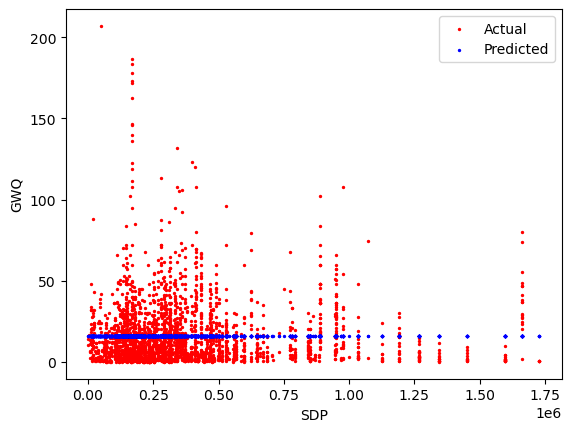

In [430]:
# import statsmodels.api as sm
import matplotlib.pyplot as plt

# plot gwq vs sdp and predicted values
plt.scatter(gwq_sdp_df['sdp'], gwq_sdp_df['gwq'], color='red', label='Actual', s=2)
plt.scatter(gwq_sdp_df['sdp'], predicted_values, color='blue', label='Predicted', s=2)
plt.xlabel('SDP')
plt.ylabel('GWQ')
plt.legend()
plt.show()


In [431]:
# test = model.outlier_test()
# print(test)

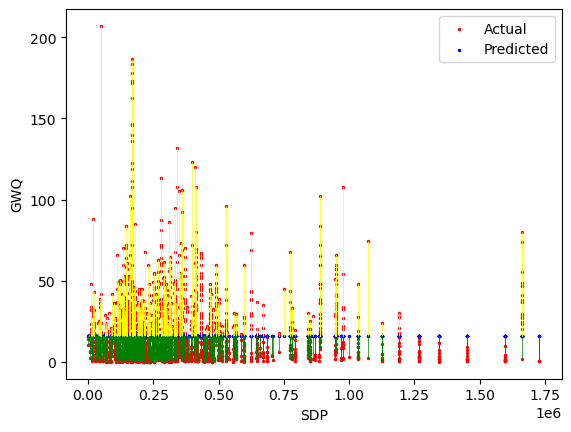

In [432]:
# 2) Visualize the model residuals (i.e.,ûi,t
# on a plot having the groundwater quality
# indicator on Y-axis and SDP on the X-axis.
plt.scatter(gwq_sdp_df['sdp'], gwq_sdp_df['gwq'], color='red', label='Actual', s=2)
plt.scatter(gwq_sdp_df['sdp'], predicted_values, color='blue', label='Predicted', s=2)
plt.xlabel('SDP')
plt.ylabel('GWQ')
# create a line between the actual and predicted values
for i in range(len(gwq_sdp_df)):
    # if residual is positive, draw a line from actual to predicted with a yellow line
    # if residual is negative, draw a line from predicted to actual with a green line
    if residuals.iloc[i] >= 0:
        plt.plot([gwq_sdp_df['sdp'].iloc[i], gwq_sdp_df['sdp'].iloc[i]], [gwq_sdp_df['gwq'].iloc[i], predicted_values.iloc[i]], color='yellow', linewidth=0.5)
    else:
        plt.plot([gwq_sdp_df['sdp'].iloc[i], gwq_sdp_df['sdp'].iloc[i]], [gwq_sdp_df['gwq'].iloc[i], predicted_values.iloc[i]], color='green', linewidth=0.5)
    
    # plt.plot([gwq_sdp_df['sdp'].iloc[i], gwq_sdp_df['sdp'].iloc[i]], [gwq_sdp_df['gwq'].iloc[i], predicted_values.iloc[i]], color='black', linewidth=0.5)
plt.legend()
plt.show()

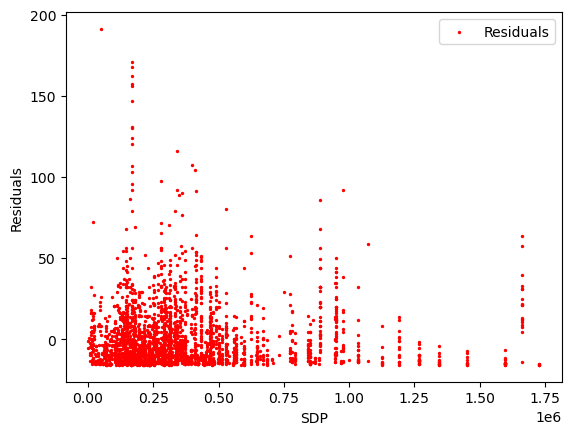

Covariance between SDP and residuals: -1.9230849623328465e-11
Correlation between SDP and residuals: -3.149055677321203e-18


In [433]:
# plot residuals vs actual values
# having ûi,ton Y-axis and SDP on x-axis.
plt.scatter(gwq_sdp_df['sdp'], residuals, color='red', label='Residuals', s=2)
plt.xlabel('SDP')
plt.ylabel('Residuals')
plt.legend()
plt.show()

# find covariance between sdp and residuals 
covariance = gwq_sdp_df['sdp'].cov(residuals)
print("Covariance between SDP and residuals:", covariance)

# find correlation between sdp and residuals
correlation = gwq_sdp_df['sdp'].corr(residuals)
print("Correlation between SDP and residuals:", correlation)



The residuals vs SDP plot shows a random pattern which is expected. The correlation between the residuals and the predicted values is close to zero. 

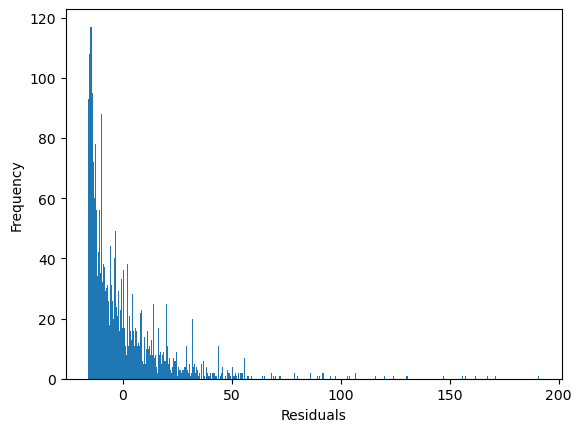

In [434]:
# plot a histogram of residuals
plt.hist(residuals, bins=500)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


In [435]:
# print(gwq_sdp_df)
gini_df = pd.read_csv("gini.csv")
# # # lowercase
gini_df['district'] = gini_df['district'].str.lower()
gwq_sdp_df = pd.merge(gwq_sdp_df, gini_df, on='district', how='left')

# # find missing values
# missing = gwq_sdp_df.isnull().sum()
# # drop 
gwq_sdp_df = gwq_sdp_df.dropna()
# # reset index
# # gwq_sdp_df = gwq_sdp_df.reset_index(drop=True)
# print(missing)
# print(gwq_sdp_df)
# missing = gwq_sdp_df.isnull().sum()
# # save
# gwq_sdp_df.to_csv('gwq_sdp_gini.csv', index=False)
# print(missing)

In [436]:
# GWQi,t = β0 + β1SDPi,t + β2SDP^2i,t + deltagini + ui,t
X = gwq_sdp_df['sdp']
X = sm.add_constant(X)
y = gwq_sdp_df['gwq']
X['sdp2'] = X['sdp']**2
X['gini'] = gwq_sdp_df['gini']
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print("Sum of residuals", model.resid.sum())

print(model.summary())
R2 = model.rsquared
predicted_values = model.predict(X)
residuals = y - predicted_values
print("Mean of residuals: ", np.mean(residuals))
print("SD of residuals:", np.std(residuals))
print("R2: ", R2)
print(model.params)

# iqr
# print(model.eval_measures.iqr())

Sum of residuals 1.8417392197989102e-06
                            OLS Regression Results                            
Dep. Variable:                    gwq   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.346
Date:                Sun, 28 Apr 2024   Prob (F-statistic):              0.258
Time:                        19:50:58   Log-Likelihood:                -11859.
No. Observations:                2691   AIC:                         2.373e+04
Df Residuals:                    2687   BIC:                         2.375e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

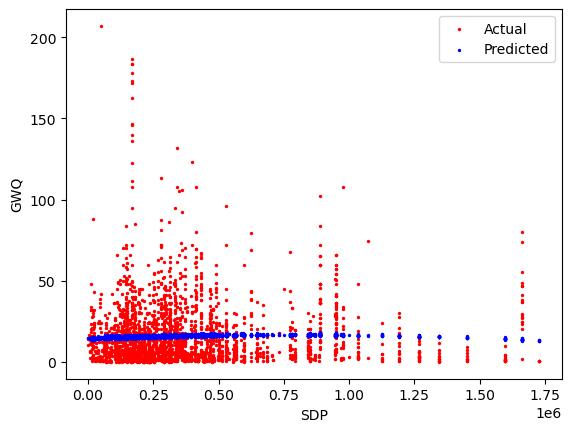

In [437]:
# plot
plt.scatter(gwq_sdp_df['sdp'], gwq_sdp_df['gwq'], color='red', label='Actual', s=2)
plt.scatter(gwq_sdp_df['sdp'], predicted_values, color='blue', label='Predicted', s=2)
plt.xlabel('SDP')
plt.ylabel('GWQ')
plt.legend()
plt.show()


In [438]:
# GWQi,t = β0 + β1SDPi,t + β2SDP^2i,t + β3SDP^3i,t  + ui,t

X = gwq_sdp_df['sdp']
X = sm.add_constant(X)
X['sdp2'] = X['sdp']**2
X['sdp3'] = X['sdp']**3
X['gini'] = gwq_sdp_df['gini']
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print("Sum of residuals", model.resid.sum())
print(model.summary())
R2 = model.rsquared
predicted_values = model.predict(X)
residuals = y - predicted_values
print("Mean of residuals: ", np.mean(residuals))
print("SD of residuals:", np.std(residuals))
print("R2: ", R2)
print(model.params)

Sum of residuals 3272.3333632013764
                            OLS Regression Results                            
Dep. Variable:                    gwq   R-squared:                      -0.040
Model:                            OLS   Adj. R-squared:                 -0.041
Method:                 Least Squares   F-statistic:                    -52.29
Date:                Sun, 28 Apr 2024   Prob (F-statistic):               1.00
Time:                        19:50:59   Log-Likelihood:                -11914.
No. Observations:                2691   AIC:                         2.383e+04
Df Residuals:                    2688   BIC:                         2.385e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.21

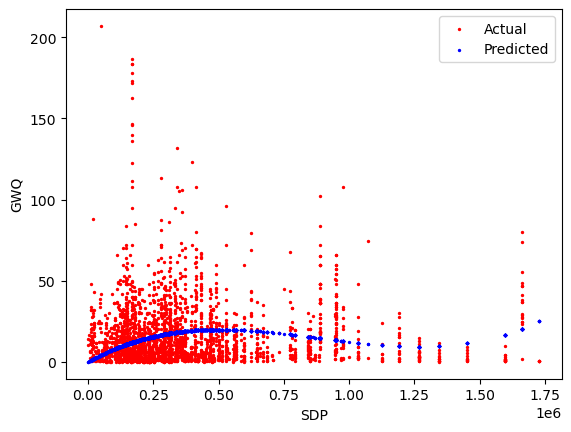

In [439]:
# plot
plt.scatter(gwq_sdp_df['sdp'], gwq_sdp_df['gwq'], color='red', label='Actual', s=2)
plt.scatter(gwq_sdp_df['sdp'], predicted_values, color='blue', label='Predicted', s=2)
plt.xlabel('SDP')
plt.ylabel('GWQ')
plt.legend()
plt.show()


In [440]:
# fix outliers
# find outliers
# outliers = model.outlier_test()
# print(outliers)

# find influence
# influence = model.get_influence()
# print(influence.summary_frame())

# remove outliers
# fix outliers
# outliers = model.outlier_test()
influence = model.get_influence()
print(influence.summary_frame())
# print(outliers)

# remove outliers

      dfb_const   dfb_sdp  dfb_sdp2  dfb_sdp3  dfb_gini   cooks_d  \
0      0.008004  0.003622 -0.014786  0.014355  0.009115  0.000091   
1      0.022448  0.011697 -0.020597  0.019249  0.022552  0.000127   
2      0.029044  0.014193 -0.010581  0.008530  0.034072  0.000001   
3      0.003164 -0.003092 -0.000225  0.000225  0.002553  0.000046   
4      0.003164 -0.003092 -0.000225  0.000225  0.002553  0.000046   
...         ...       ...       ...       ...       ...       ...   
2771   0.010546  0.014706 -0.017388  0.015915  0.013133  0.000040   
2772   0.011223  0.016740 -0.018163  0.016497  0.013423  0.000129   
2773   0.010370  0.013335 -0.015064  0.010342  0.012219  0.000107   
2774  -0.014871 -0.014294  0.023954 -0.039664 -0.015988  0.001851   
2775   0.037789  0.053683 -0.090027  0.120739  0.035524  0.008187   

      standard_resid  hat_diag  dffits_internal  student_resid    dffits  
0          -0.669382  0.001017        -0.021362      -0.669313 -0.021360  
1          -0.739248 

In [441]:
cutoff_leverage = ((2*4)+2)/len(gwq_sdp_df)
print(cutoff_leverage)
leverage = influence.hat_matrix_diag
print(gwq_sdp_df)

0.0037160906726124115
              state            district  year        gwq           sdp  gini
0       west bengal  24 paraganas north  2017   5.684210  6.237870e+05  0.38
1       west bengal  24 paraganas north  2018   3.843750  6.592880e+05  0.38
2         telangana            adilabad  2004  14.400000  1.617901e+05  0.37
3     uttar pradesh                agra  2000   6.000000  3.510838e+05  0.26
4     uttar pradesh                agra  2000   6.000000  3.510838e+05  0.26
...             ...                 ...   ...        ...           ...   ...
2771    maharashtra            yavatmal  2012   5.454546  1.189711e+06  0.25
2772    maharashtra            yavatmal  2013   2.057143  1.267551e+06  0.25
2773    maharashtra            yavatmal  2014   3.473684  1.345341e+06  0.25
2774    maharashtra            yavatmal  2016   1.472222  1.596121e+06  0.25
2775    maharashtra            yavatmal  2017  46.799999  1.661065e+06  0.25

[2691 rows x 6 columns]


In [442]:
# GWQi,t = β0 + β1SDPi,t + β2SDP^2i,t + β3SDP^3i,t  + gini + ui,t

X = gwq_sdp_df['sdp']
X = sm.add_constant(X)
X['sdp2'] = X['sdp']**2
X['sdp3'] = X['sdp']**3
X['gini'] = gwq_sdp_df['gini']
y = gwq_sdp_df['gwq']
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print("Sum of residuals", model.resid.sum())
print(model.summary())
R2 = model.rsquared
predicted_values = model.predict(X)
residuals = y - predicted_values
print("Mean of residuals: ", np.mean(residuals))
print("SD of residuals:", np.std(residuals))
print("R2: ", R2)
print(model.params)

Sum of residuals 3272.3333632013764
                            OLS Regression Results                            
Dep. Variable:                    gwq   R-squared:                      -0.040
Model:                            OLS   Adj. R-squared:                 -0.041
Method:                 Least Squares   F-statistic:                    -52.29
Date:                Sun, 28 Apr 2024   Prob (F-statistic):               1.00
Time:                        19:51:04   Log-Likelihood:                -11914.
No. Observations:                2691   AIC:                         2.383e+04
Df Residuals:                    2688   BIC:                         2.385e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.21